In [41]:
import requests
import os
from PIL import Image
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import *
import scipy.ndimage


# Converting Image Format

In [2]:
name='picture.jpg' # create a jpg image
pic = requests.get('https://picsum.photos/500/500/?random') # random images

with open(name,'wb') as pic_file:
    pic_file.write(pic.content)
    
datpath=os.path.join( os.getcwd() , 'picture.jpg')

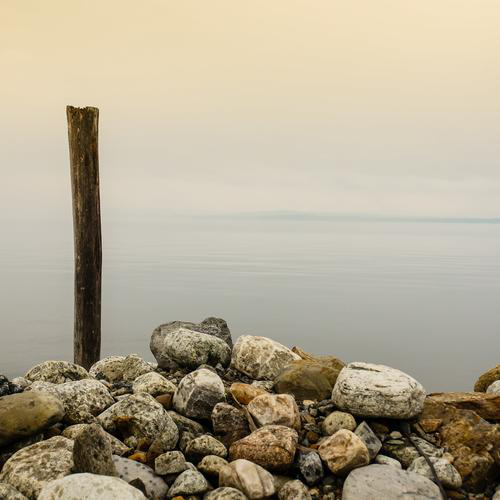

In [3]:
img=Image.open(datpath)
img

In [4]:
filelist = glob.glob(os.getcwd() + '/*.jpg')

In [5]:
for infile in filelist:
    outfile = os.path.splitext(infile)[0] + '.png' # remove .jpg and add .png
    
    if infile != outfile:
        try:
            Image.open(infile).save(outfile)
        except IOError:
            print("Cannot convert")

# Image Manipulations (Geometric operation)

## Resize

In [6]:
img.size

(500, 500)

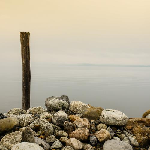

In [7]:
img.resize((150,150))

## Crop

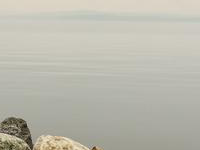

In [8]:
box = (200,200,400,350)
img.crop(box)

## Rotate

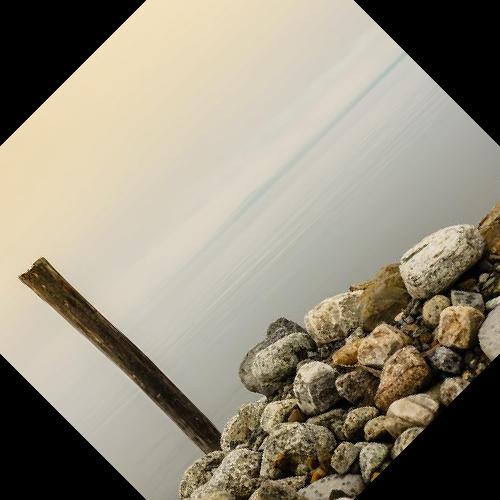

In [9]:
img.rotate(45)

# Binarization

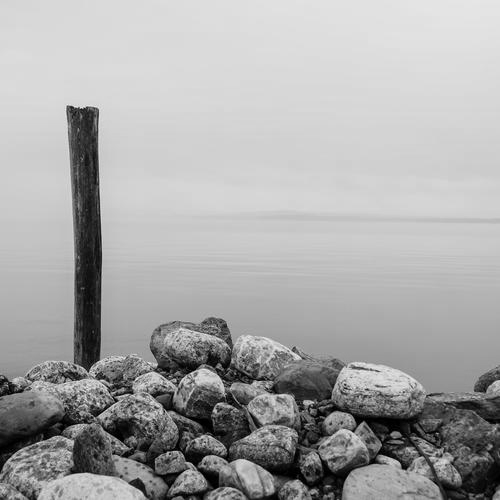

In [10]:
im=img.convert('L')
im

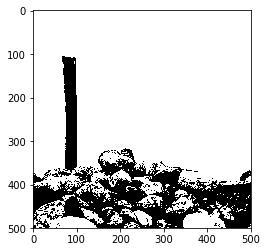

In [11]:
im=np.array(im)
mod_im=np.zeros_like(im)

threshold=120 # threshold

mod_im[im < threshold]=0
mod_im[im >= threshold]=255

plt.imshow(mod_im, cmap = cm.gray)
plt.show()

# Histogram

## Showing a histogram

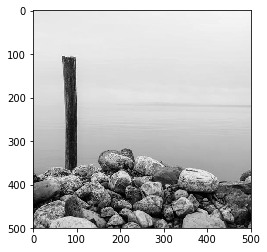

In [12]:
plt.imshow(im, cmap=cm.gray)
plt.show()

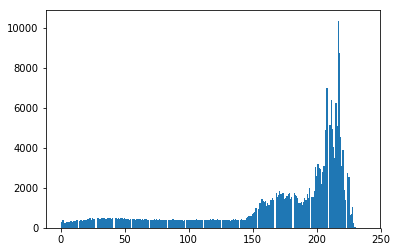

In [13]:
dummy=hist(im.flatten(),255)

## Equalization of an image histogram

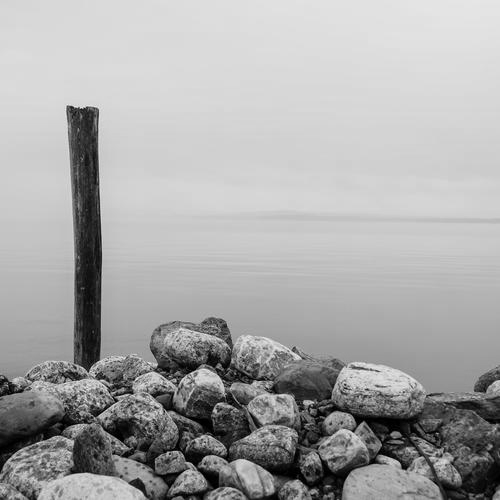

In [14]:
img.convert('L')

[np.ma.masked_equal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.masked_equal.html)

In [15]:
im=np.array(img.convert('L'))

histg, bins = np.histogram(im.flatten(), 256, [0,255])

cdf=histg.cumsum() # Cumulative distribution function
cdf_m = np.ma.masked_equal(cdf,0) # ignore 0 

num_cdf_m = (cdf_m - cdf_m.min())*255  # numerator
den_cdf_m = (cdf_m.max() - cdf_m.min() ) # denominator

cdf_m = num_cdf_m / den_cdf_m # min-max scaling multiplied by 255

cdf= np.ma.filled(cdf_m,0).astype('uint8')

im2=cdf[im.flatten()]

im3 = np.reshape(im2, im.shape)

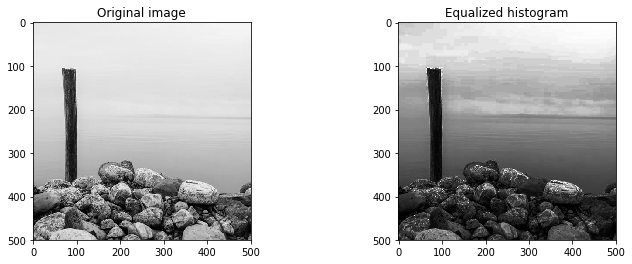

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.title('Original image')

plt.subplot(122)
plt.imshow(im3, cmap='gray')
plt.title('Equalized histogram')
plt.show()

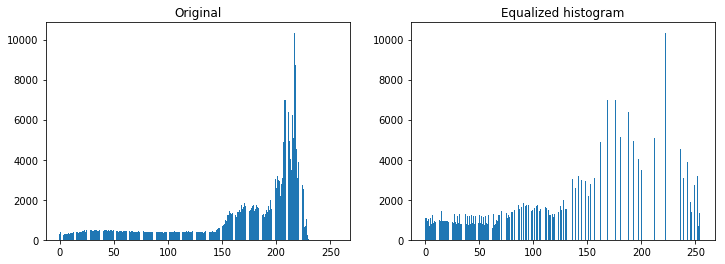

In [17]:
hist_original, bins = np.histogram(im.flatten(), 256, [0,255])
hist_equalized, bins = np.histogram(im3.flatten(), 256, [0,255])

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title("Original")
plt.bar(x=np.linspace(0,255,256), height=hist_original)

plt.subplot(122)
plt.title("Equalized histogram")
plt.bar(x=np.linspace(0,255,256), height=hist_equalized)

plt.show()

# Gamma correction

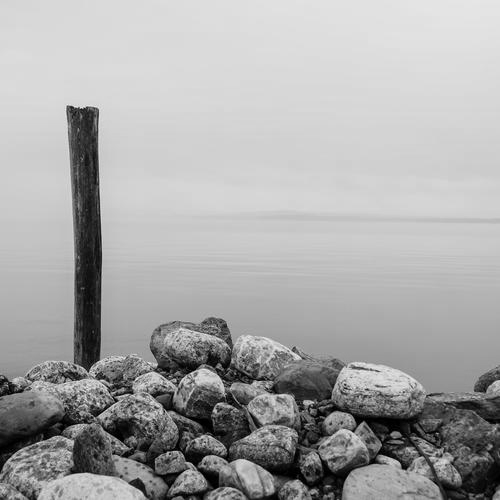

In [18]:
img.convert('L')

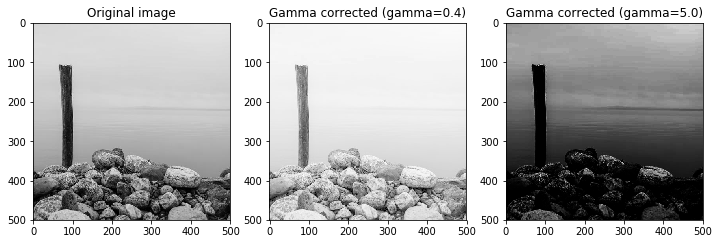

In [19]:
gamma=0.4
eps=1e-10

im=np.array(img.convert('L')).astype(float)

im = im/im.max()

im = np.exp( np.log(im+eps)*gamma ) * 255
im = im.astype(int)


plt.figure(figsize=(12,5))
plt.subplot(131)
plt.imshow(img.convert('L'), cmap='gray')
plt.title('Original image')

plt.subplot(132)
plt.imshow(im,cmap='gray')
plt.title('Gamma corrected (gamma=%0.1f)'%gamma)


gamma2=5
im=np.array(img.convert('L')).astype(float)

im = im/im.max()

im = np.exp( np.log(im+eps)*gamma2 ) * 255
im = im.astype(int)



plt.subplot(133)
plt.imshow(im,cmap='gray')
plt.title('Gamma corrected (gamma=%0.1f)'%gamma2)



plt.show()

# Transformation

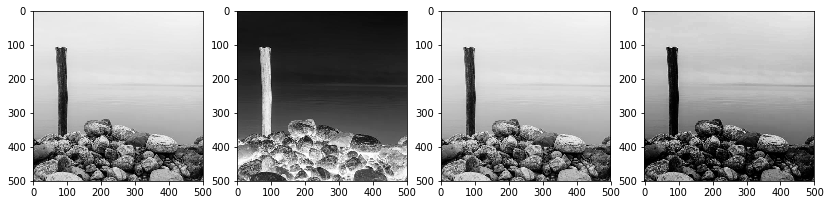

In [20]:
im = np.array(img.convert('L'))

im2 = 255 - im # negative image

im3 = (100/255) * im + 100  # Calmp to interval 100 to 200

im4 = 255 * (im/255)**2

plt.figure(figsize=(14,4))
plt.subplot(141)
plt.imshow(im, cmap='gray')

plt.subplot(142)
plt.imshow(im2, cmap='gray')

plt.subplot(143)
plt.imshow(im3, cmap='gray')

plt.subplot(144)
plt.imshow(im4, cmap='gray')

plt.show()

# Applying Filter to Images Using the Python Image Library

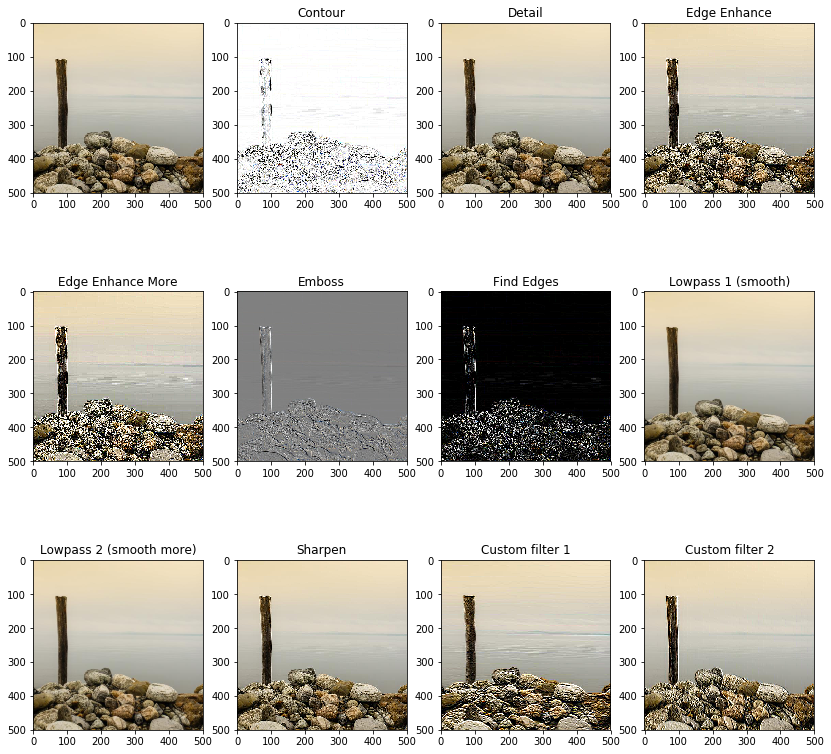

In [21]:
from PIL import ImageFilter

plt.figure(figsize=(14,14))
plt.subplot(3,4,1)
plt.imshow(img)

plt.subplot(3,4,2)
im2 = img.filter(ImageFilter.CONTOUR)
plt.imshow(im2)
plt.title('Contour')

plt.subplot(3,4,3)
im3 = img.filter(ImageFilter.DETAIL)
plt.imshow(im3)
plt.title('Detail')

plt.subplot(3,4,4)
im4 = img.filter(ImageFilter.EDGE_ENHANCE)
plt.imshow(im4)
plt.title('Edge Enhance')

plt.subplot(3,4,5)
im5 = img.filter(ImageFilter.EDGE_ENHANCE_MORE) # another typpe of Laplacian filter
plt.imshow(im5)
plt.title('Edge Enhance More')

plt.subplot(3,4,6)
im6 = img.filter(ImageFilter.EMBOSS) 
plt.imshow(im6)
plt.title('Emboss')

plt.subplot(3,4,7)
im7 = img.filter(ImageFilter.FIND_EDGES) # sobel filter
plt.imshow(im7)
plt.title('Find Edges')

plt.subplot(3,4,8)
im8 = img.filter(ImageFilter.SMOOTH) 
plt.imshow(im8)
plt.title('Lowpass 1 (smooth)')

plt.subplot(3,4,9)
im9 = img.filter(ImageFilter.SMOOTH_MORE) 
plt.imshow(im9)
plt.title('Lowpass 2 (smooth more)')

plt.subplot(3,4,10)
im10 = img.filter(ImageFilter.SHARPEN) 
plt.imshow(im10)
plt.title('Sharpen')


# Custom kernel 1
size = (3,3)
kernel1 = [1, 1, 1, 1, -1, 1, -1, -1, -1] 
ker1 = ImageFilter.Kernel(size, kernel1, scale=None, offset = 0)

plt.subplot(3,4,11)
im11 = img.filter(ker1) 
plt.imshow(im11)
plt.title('Custom filter 1')

# Custom kernel 2 
size = (3,3)
kernel2 = [1, 0, -1, 1, 0, -1, 0, 0, -1]
ker2 = ImageFilter.Kernel(size, kernel2, scale=None, offset = 0)

plt.subplot(3,4,12)
im12 = img.filter(ker2) 
plt.imshow(im12)
plt.title('Custom filter 2')


plt.show()

# Other Filters (Mean, Minimum, Maximum, Median)

In [60]:
def addGaussianNoise(src):
    row,col,ch= src.shape
    mean = 0
    var = 0.1
    sigma = 15
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = src + gauss

    return noisy

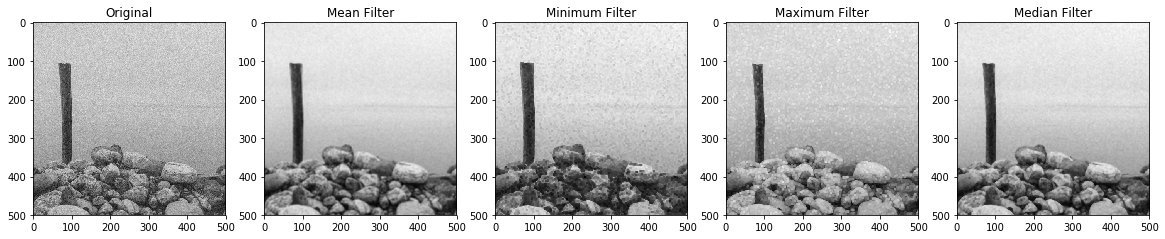

In [82]:
im1=img.convert('L')
im1=np.array(im1)
im1=np.reshape(im1,(im1.shape[0],im1.shape[1],1))
im1=addGaussianNoise(im1) # add random noise
im1=np.reshape(im1,(im1.shape[0],im1.shape[1]))

# Mean Filter
k=np.ones((5,5))/25
b1=scipy.ndimage.filters.convolve(im1,k)

#Minimum Filter
b2=scipy.ndimage.filters.minimum_filter(im1,size=5,footprint=None, output=None,
                                    mode='reflect', cval=0.0,origin=0)


# Maximum Filter
b3=scipy.ndimage.filters.maximum_filter(im1,size=5,footprint=None, output=None,
                                    mode='reflect', cval=0.0,origin=0)

# Median Filter
b4=scipy.ndimage.filters.median_filter(im1,size=5,footprint=None, output=None,
                                    mode='reflect', cval=0.0,origin=0)


plt.figure(figsize=(20,7))
plt.subplot(151)
plt.imshow(im1,'gray')
plt.title('Original')

plt.subplot(152)
plt.imshow(b1,'gray')
plt.title('Mean Filter')

plt.subplot(153)
plt.imshow(b2,'gray')
plt.title('Minimum Filter')

plt.subplot(154)
plt.imshow(b3,'gray')
plt.title('Maximum Filter')

plt.subplot(155)
plt.imshow(b4,'gray')
plt.title('Median Filter')


plt.show()

# Edge Detection by Operators

## Prewitt Operator

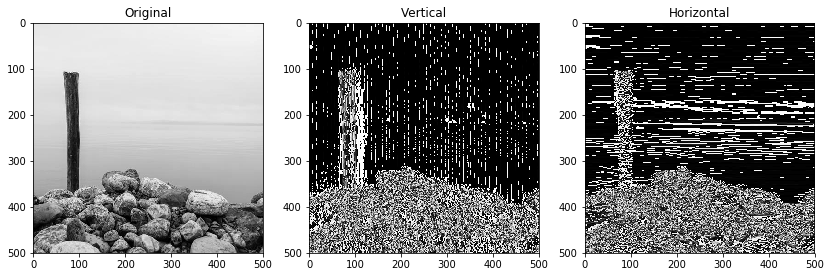

In [95]:
from skimage import img_as_ubyte
from scipy import ndimage

im=np.array(img.convert('L'))

prewitt_vertical = np.array([[-1,0,1],[-1,0,1],[-1,0,1]],dtype='float64')
prewitt_horizontal = np.array([[-1,-1,-1],[0,0,0],[1,1,1]],dtype='float64')

prewitt_vertical_out = img_as_ubyte(ndimage.convolve(im,prewitt_vertical, mode='constant',cval=0.0))
prewitt_horizontal_out = img_as_ubyte(ndimage.convolve(im,prewitt_horizontal, mode='constant',cval=0.0))

plt.figure(figsize=(14,5))

plt.subplot(131)
plt.imshow(im,cmap='gray')
plt.title('Original')

plt.subplot(132)
plt.imshow(prewitt_vertical_out,cmap='gray')
plt.title('Vertical')

plt.subplot(133)
plt.imshow(prewitt_horizontal_out,cmap='gray')
plt.title('Horizontal')

plt.show()

## Sobel Operator (skimage)

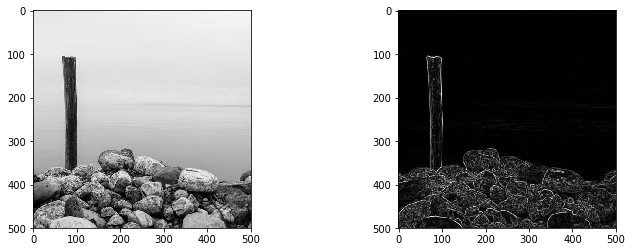

In [107]:
from skimage import filters
im=filters.sobel(img.convert('L'))

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(np.array(img.convert('L')),cmap='gray')
plt.subplot(122)
plt.imshow(im,cmap='gray')
plt.show()

## Sobel Operator (OpenCV)

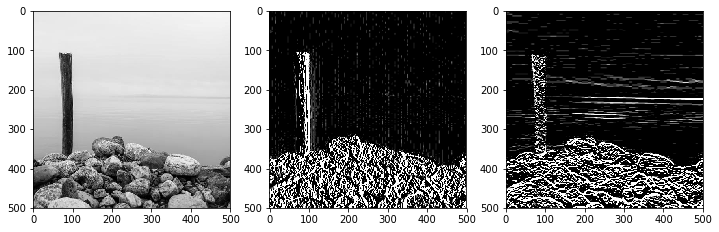

In [114]:
sobel_x = cv2.Sobel(np.array(img.convert('L')),-1,1,0,ksize=5)
sobel_y = cv2.Sobel(np.array(img.convert('L')),-1,0,1,ksize=5)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(np.array(img.convert('L')),cmap='gray')
plt.subplot(132)
plt.imshow(sobel_x,cmap='gray')
plt.subplot(133)
plt.imshow(sobel_y,cmap='gray')
plt.show()


## Laplacian

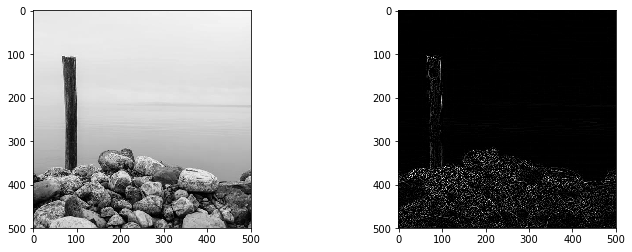

In [122]:
im=cv2.Laplacian(np.array(img.convert('L')),-1)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(np.array(img.convert('L')),cmap='gray')
plt.subplot(122)
plt.imshow(im,cmap='gray')
plt.show()